1. Load data
2. Build network
3. Preprocess data
4. Train
5. **Test**

Step five: test the network on unseen data.

In [1]:
# the program so far

# load
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# unprocessed data
raw_test_images, raw_test_labels = test_images, test_labels

# preprocess
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# build
from tensorflow.keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# train
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2541 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1042 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0689 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0497 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0373 - accuracy: 0.9885


In [2]:
# evaluate on the test set
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9783


`network.evaluate` runs the test image data, sample by sample, through the network in a forward pass. and prints the overall loss and a more meaningful figure - the test set accuracy.

[RUN]

The test accuracy is a little lower than training accuracy - by about one per cent. This is normal - neural networks generally perform less well on new data. We will talk about that later, too.   

In [3]:
# network prediction for a single sample
# ten numbers, each a probability of class membership
network.predict(test_images[:1])

array([[6.0067102e-09, 1.7494724e-10, 9.0381388e-07, 1.9298839e-04,
        1.1498091e-11, 3.3151554e-07, 1.8113935e-14, 9.9979860e-01,
        1.7521591e-06, 5.3476706e-06]], dtype=float32)

We can see the softmax output for a single sample by calling `predict` on the network.

There are ten numbers, each a 'probability' of class membership.

In [4]:
# what is the most probable class?
# the index of the largest element of the output vector
import numpy as np
np.argmax(network.predict(test_images[:1]))

7

The network prediction is the maximum of the softmax output - the most likely class of this image. We need the argument of the maximum of the output array. 

It's a seven.

In [5]:
# does the prediction agree with the label?
print(raw_test_labels[0])

7


How does network prediction compare to label?

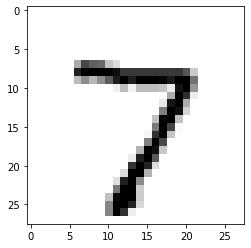

In [6]:
import matplotlib.pyplot as plt
plt.imshow(raw_test_images[0], cmap=plt.cm.binary)
plt.show()

And as final confirmation, the image is indeed a seven. 

Remember that the network does not have eyes and a visual cortex. The network only mapped a 784 element vector to a ten component probability vector. We supply the meaning.

We have built, trained and tested our first neural network. Although the code is unfamiliar, the program is not long. Most of the work has of course been accomplished by TensorFlow's powerful libraries. Our goal is to use this tool to build and train neural networks for a variety of different problem types, and how to address the discrepancy between prediction on training and unseen data.

But before we do these things, we have to digress into tensor maths and learn how the optimiser does its job so wonderfully. These two items are the subject of the remainder of this topic.